### Notebook to match names of districts in census and geopanda

In [7]:

import geopandas as gpd
import shapely.ops
import shapely.geometry
import pandas as pd
#import shapefile as shp
import matplotlib
import matplotlib.pyplot as plt
import os
import importlib
#imp.reload(AnalyzeLangs)
from AnalyzeLangs import find_perc, filter_perc_lang, find_dialects_perc, find_top_langs


#### 2001 Census districts with map geometry

In [8]:
mapPath = "C://Users/Owner/Desktop/Projects/Research/maps/Data/IndiaMaps/maps-master/Districts/"
df = gpd.read_file(mapPath + 'Census_2001/2001_Dist.shp')

#shf = shp.Reader(datapath + 'Census_2001/2001_Dist.shp')
display(df.head())
display(df.shape)

,ST_NM,ST_CEN_CD,DT_CEN_CD,DISTRICT,geometry
0,Gujarat,24,15,Anand,"MULTIPOLYGON (((72.62987 22.81814, 72.63297 22..."
1,Andhra Pradesh,28,22,Anantapur,"POLYGON ((78.14427 14.94530, 78.14382 14.94009..."
2,Jammu and Kashmir,01,06,Anantnag,"POLYGON ((75.63102 34.22268, 75.63737 34.22115..."
3,Orissa,21,15,Anugul,"POLYGON ((85.39504 21.18471, 85.39504 21.18471..."
4,Bihar,10,07,Araria,"POLYGON ((87.64834 26.39293, 87.64932 26.39037..."


(594, 5)

In [9]:
df[df["ST_NM"]=="Chandigarh"]

,ST_NM,ST_CEN_CD,DT_CEN_CD,DISTRICT,geometry
98,Chandigarh,04,01,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


#### Find out district names shared by more than one district, and replace them as "district, State"

In [10]:
dupli_districts = df["DISTRICT"].value_counts()[df["DISTRICT"].value_counts()>1].index.tolist()
for d in dupli_districts:
    df.loc[df["DISTRICT"]==d, "DISTRICT"] = d+", " +df["ST_NM"].str.strip()

In [11]:
mn = df["ST_NM"].unique().tolist()

### 2001 Language Data

In [12]:
DataPath = "C://Users/Owner/Desktop/Projects/Research/maps/Data/CleanData/"

#d11 = pd.read_pickle(DataPath + "LangData2011.pkl")
d01 = pd.read_pickle(DataPath + "LangData2001.pkl")

In [13]:
d01.head()

,State,District,Tehsil,AreaName,LangGroup,LangGroupCode,LangName,LangCode,Total,Rural,Urban
1,1,0,0,Jammu&Kashmir,Assamese,1000.0,Assamese,1002,6041,1705,4336
2,1,0,0,Jammu&Kashmir,Assamese,1000.0,Assamese_Other,1999,29,17,12
4,1,0,0,Jammu&Kashmir,Bengali,2000.0,Bengali,2004,13700,3790,9910
5,1,0,0,Jammu&Kashmir,Bengali,2000.0,Chakma,2007,17,1,16
6,1,0,0,Jammu&Kashmir,Bengali,2000.0,Haijong/Hajong,2009,4,0,4


In [14]:
d01["State"] = d01["State"].astype(str)

In [16]:
#"aa" + d01["State"].str.strip().astype(str)

In [17]:
dupli_districts = d01[d01["District"]==1]["AreaName"].value_counts()\
[d01[d01["District"]==1]["AreaName"].value_counts()>1].index.tolist()
for d in dupli_districts:
    d01.loc[d01["AreaName"]==d, "DISTRICT"] = d+"+" +d01["State"].str.strip().astype(str)

In [18]:
mn = df["ST_NM"].unique().tolist()
mn.sort()

In [19]:
cn = d01["AreaName"][d01["District"]==0].unique().tolist()
cn.sort()

In [20]:
lang_dist01 = d01["AreaName"][d01["District"]==1].unique().tolist()


In [21]:
display(len(mn), len(cn))

35

34

In [42]:
cn

['Andaman&NicobarIslands',
 'AndhraPradesh',
 'ArunachalPradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Dadra&NagarHaveli',
 'Daman&Diu',
 'Goa',
 'Gujarat',
 'Haryana',
 'HimachalPradesh',
 'Jammu&Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Lakshadweep',
 'MadhyaPradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'NctOfDelhi',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'TamilNadu',
 'Tripura',
 'UttarPradesh',
 'Uttarakhand',
 'WestBengal']

#### Change Census State Names to Map State Names

In [ ]:
n_s = len()

In [7]:
data_names = ['Puducherry', 'Senapati(ExclSub-Divisions)', 'Nan', 'Ri-Bhoi',
       'Bulandshahar', 'Maharajganj']
map_names = [ 'Pondicherry', 'Senapati(Excl.3sub-divisions)', 'DataNotAvailable'
             , 'RiBhoi', 'Bulandshahr', 'Mahrajganj']
for i in range(len(data_names)):
    df.loc[df["DISTRICT"]==map_names[i], "DISTRICT"] = data_names[i]

,State,District,Tehsil,AreaName,LangGroup,LangGroupCode,LangName,LangCode,Total,Rural,Urban
1,1,0,0,Jammu&Kashmir,Assamese,1000.0,Assamese,1002,6041,1705,4336
2,1,0,0,Jammu&Kashmir,Assamese,1000.0,Assamese_Other,1999,29,17,12
4,1,0,0,Jammu&Kashmir,Bengali,2000.0,Bengali,2004,13700,3790,9910
5,1,0,0,Jammu&Kashmir,Bengali,2000.0,Chakma,2007,17,1,16
6,1,0,0,Jammu&Kashmir,Bengali,2000.0,Haijong/Hajong,2009,4,0,4


#### Calculate % speakers for different dialects & languages

In [5]:
d01_ = find_perc(d01)
df_01 = d01_[d01_["District"]!=0]
df_01["DISTRICT"] = df_01["AreaName"]
df_01.shape
#d01_districts = d01[d01["Area Name"]==]

C:\Users\Owner\AppData\Local\Temp\ipykernel_8788\2780605523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01["DISTRICT"] = df_01["AreaName"]


(39481, 24)

In [6]:
# names = df_01[df_01["District"]!=0]["AreaName"].unique().tolist()
# names.sort()
# names

In [7]:
#df["ST_NM"].unique()

In [8]:
df["DISTRICT"] = df['DISTRICT'].str.replace(' ', '')

#### Update distrct names to match data

In [9]:
mapDists = df["DISTRICT"].unique().tolist()
censDists = df_01["DISTRICT"].unique().tolist()
L1 = [x for x in mapDists if x not in censDists]
L1.sort()
L2 = [x for x in  censDists if x not in mapDists]
L2.sort()
display( L1, L2, len(L1), len(L2) )

['Bulandshahr',
 'Chandigarh',
 'DataNotAvailable',
 'Mahrajganj',
 'Pondicherry',
 'RiBhoi',
 'Senapati(Excl.3sub-divisions)']

['Bulandshahar',
 'Maharajganj',
 'Nan',
 'Puducherry',
 'Ri-Bhoi',
 'Senapati(ExclSub-Divisions)']

7

6

In [10]:
data_names = ['Puducherry', 'Senapati(ExclSub-Divisions)', 'Nan', 'Ri-Bhoi',
       'Bulandshahar', 'Maharajganj']
map_names = [ 'Pondicherry', 'Senapati(Excl.3sub-divisions)', 'DataNotAvailable'
             , 'RiBhoi', 'Bulandshahr', 'Mahrajganj']
for i in range(len(data_names)):
    df.loc[df["DISTRICT"]==map_names[i], "DISTRICT"] = data_names[i]

#### Filter data by language/ dialect and merge, then show prevalence of language/ dialect

In [11]:
def plot_lang_map(lang_name, 
                  lang_type="LangName", 
                  colorscheme ="Blues", 
                  State = "India", 
                  showStates = False,
                 outline = False):
    
    #lang_name = str(lang_name)
    df_test = filter_perc_lang(df_01, lang_type, lang_name, "District")
    df_test["DISTRICT"] = df_test["DistrictName"]
    df_plot = df.merge(df_test, on = "DISTRICT", how = "outer")
    #display(df_plot.shape)
    #df_test.head()

    fig, ax = plt.subplots(figsize = (10,10))
    
    if (State == "India"):
        
        ax.set_title("Percentage distribution of "+str(lang_name)+" speakers, 2001")  
        df_plot.plot(column = 'Total_%', ax=ax, cmap = colorscheme,
                        legend = True, legend_kwds={'shrink': 0.3}, 
                        markersize = 10)
    
        if (showStates): 
        #darkest = matplotlib.colors.ListedColormap(colorscheme[10:,:-1])
            States = df_plot["ST_NM"].unique().tolist()
            for s in States:
                ls = shapely.ops.unary_union(df_plot["geometry"][df_plot["ST_NM"]==s]).boundary
                gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)

        if (outline):
            ls = shapely.ops.unary_union(df_plot["geometry"]).boundary
            gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)
            
    
    else:
        df_plot = df_plot[df_plot["ST_NM"]==State]  
        df_plot.plot(column = 'Total_%', ax=ax, cmap = colorscheme,
                        legend = True, legend_kwds={'shrink': 0.3}, 
                        markersize = 10)
        df_plot.boundary.plot(edgecolor="black", lw=0.5, linestyle = '--', ax=ax)
        ax.set_title("Percentage distribution of "+str(lang_name)+" speakers in " + State + ", 2001")

C:\Users\Owner\Desktop\Projects\Research\maps\Notebooks\AnalyzeLangs.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dflang.append(pd.DataFrame(toAdd))


CPU times: total: 250 ms
Wall time: 258 ms


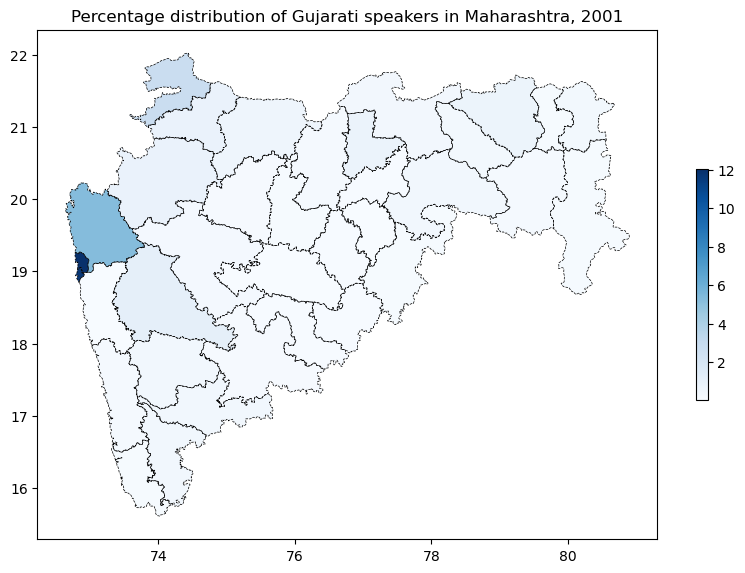

In [12]:
%%time
plot_lang_map("Gujarati", 
              colorscheme = "Blues", 
              lang_type = "LangName", 
              State = "Maharashtra", 
              showStates = False,
             outline = True
             )

#### Plot highest, second highest/ third highest language in any district...

In [13]:
def find_top_langs(df, lang_type, rank):
    import warnings
    warnings.filterwarnings("ignore")
    pv = df[["AreaName", lang_type, lang_type + "_Total_%"]].pivot_table(index = "AreaName", 
                                                                      columns = lang_type, 
                                                                     values =  lang_type +"_Total_%")
    pv = pv.rename_axis(None, axis=0)  
    #pv = pv.rename_axis(None, axis=1)  
    pv.columns.name = None
    pv.index.name =None
    pv = pv.fillna(0)
    pv.head()
    pv = pv.rank(ascending=False, method='first', axis=1)
    pv = pv.reset_index().melt(id_vars='index')

    pv1 = pv[pv['value'] == rank]
    pd.DataFrame ( pv1.groupby('index')['variable'].apply(list).reset_index())
    pv1["rank_"+str(rank)] = pv1["variable"]

#     pv2 = pv[pv['value'] == 2]
#     pd.DataFrame ( pv2.groupby('index')['variable'].apply(list).reset_index())
#     pv2["rank_2"] = pv2["variable"]

#     pv3 = pv[pv['value'] == 3]
#     pd.DataFrame ( pv3.groupby('index')['variable'].apply(list).reset_index())
#     pv3["rank_3"] = pv3["variable"]

#     pv = pv1[["index", "rank_1"]].merge(pv2[["index", "rank_2"]], on = "index" )
#     pv = pv.merge(pv3[["index", "rank_3"]], on = "index" )
    return pv1

In [14]:
d=find_top_langs(df_01, "LangName", 1)

In [15]:
d["rank_1"].nunique()

84

In [16]:
def plot_mode_map(lang_type="LangName", 
                  rank = 1, 
                  State = "India", 
                  showStates = False,
                  outline = False,
                 showLegend = False):
    
    #lang_name = str(lang_name)
    df_test = find_top_langs(df_01, lang_type, rank)
    df_test["DISTRICT"] = df_test["index"]
    df_plot = df.merge(df_test, on = "DISTRICT", how = "outer")
    
    if rank==1:
        modeTitle = "Most spoken languages by district "
        
    if rank==2:
        modeTitle = "2nd most spoken languages by district "
        
    if rank==3:
        modeTitle = "3rd most spoken languages by district "
        
    if rank>3:
        modeTitle = str(rank)+"th most spoken languages by district "

    fig, ax = plt.subplots(figsize = (10,10))
    
    if (State == "India"):
        
        ax.set_title(modeTitle +", 2001") 
        ax.legend(loc="upper left")
        df_plot.plot(column = "rank_"+str(rank), categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=showLegend, ax=ax)
    
        if (showStates): 
        #darkest = matplotlib.colors.ListedColormap(colorscheme[10:,:-1])
            States = df_plot["ST_NM"].unique().tolist()
            for s in States:
                ls = shapely.ops.unary_union(df_plot["geometry"][df_plot["ST_NM"]==s]).boundary
                gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)

        if (outline):
            ls = shapely.ops.unary_union(df_plot["geometry"]).boundary
            gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)
            
    
    else:
        
        df_plot = df_plot[df_plot["ST_NM"]==State]  
        df_plot.plot(column = "rank_"+str(rank), categorical=True, 
                     cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=showLegend, legend_kwds={'bbox_to_anchor':(.5, 0.95),'fontsize':10,'frameon':False},
         ax=ax)
        #ax.legend(loc='lower center')
        df_plot.boundary.plot(edgecolor="black", lw=0.5, linestyle = '--', ax=ax)
        ax.set_title(modeTitle + State + ", 2001")

In [27]:
df["ST_NM"].unique()

array(['Gujarat', 'Andhra Pradesh', 'Jammu and Kashmir', 'Orissa',
       'Bihar', 'Tamil Nadu', 'Uttar Pradesh', 'Maharashtra', 'Karnataka',
       'Uttarakhand', 'Mizoram', 'Rajasthan', 'Kerala', 'Haryana',
       'Punjab', 'West Bengal', 'Assam', 'Madhya Pradesh',
       'Himachal Pradesh', 'Manipur', 'Jharkhand', 'Chhattisgarh',
       'Arunanchal Pradesh', 'Chandigarh', 'Dadara & Nagar Havelli',
       'Daman & Diu', 'Tripura', 'Sikkim', 'Meghalaya', 'Nagaland', 'Goa',
       'Puducherry', 'Delhi  & NCR', 'Andaman & Nicobar Island',
       'Lakshadweep'], dtype=object)

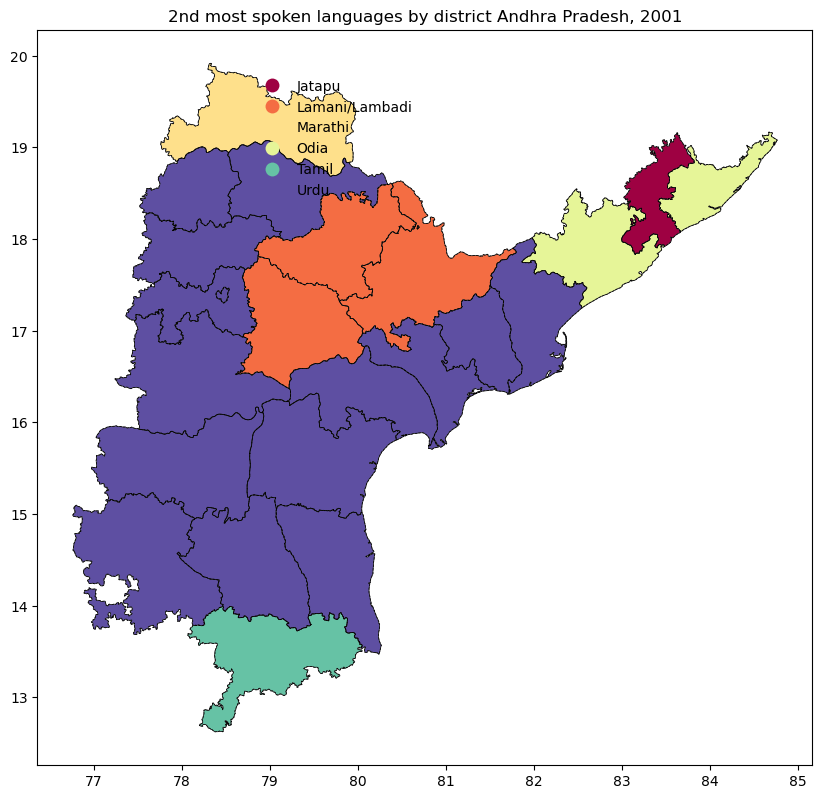

In [31]:
plot_mode_map  (lang_type="LangName", #LangName
                  rank = 2, 
                  State = "Andhra Pradesh", 
                  showStates = False,
                  outline = False,
               showLegend = True)

In [75]:
plot_lang_map("Bhojpuri")

KeyError: "['Lang_Total_%', 'Lang_Rural_%', 'Lang_Urban_%'] not in index"

C:\Users\Owner\Desktop\Projects\Research\maps\Notebooks\AnalyzeLangs.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dflang.append(pd.DataFrame(toAdd))


<Axes: title={'center': 'Percentage distribution of Urdu speakers, 2001'}>

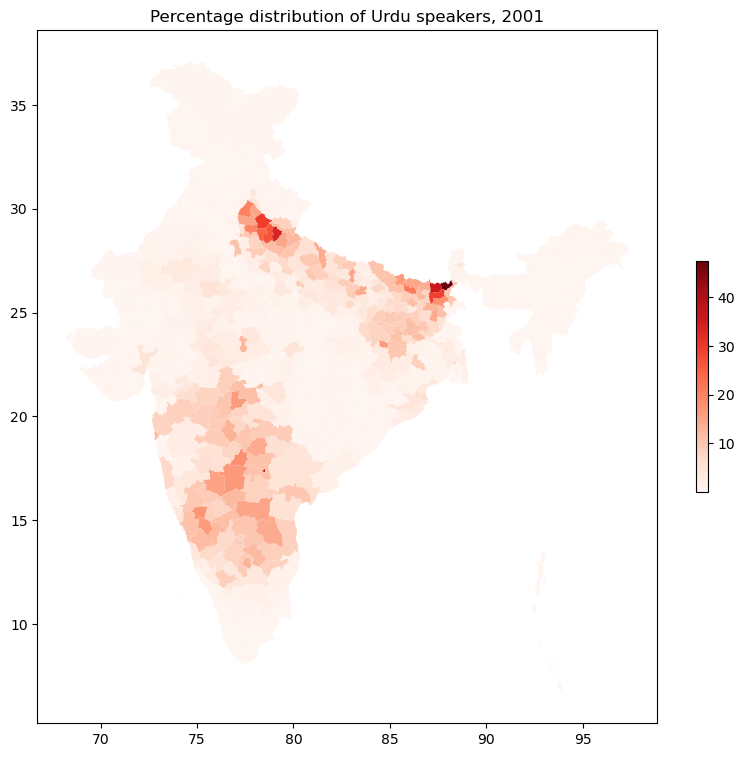

In [42]:
lang_type = "LangName" #"LangGroup"
lang_name = "Urdu" 
df_test = filter_perc_lang(df_01, lang_type, lang_name, "District")
df_test["DISTRICT"] = df_test["DistrictName"]
df_plot = df.merge(df_test, on = "DISTRICT", how = "outer")
#display(df_plot.shape)
#df_test.head()

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Percentage distribution of "+str(lang_name)+" speakers, 2001")
df_plot.plot(column = 'Total_%', ax=ax, cmap = 'Reds',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
#ax.grid(True)

<Axes: title={'center': 'Percentage distribution of Hindi speakers, 2001'}>

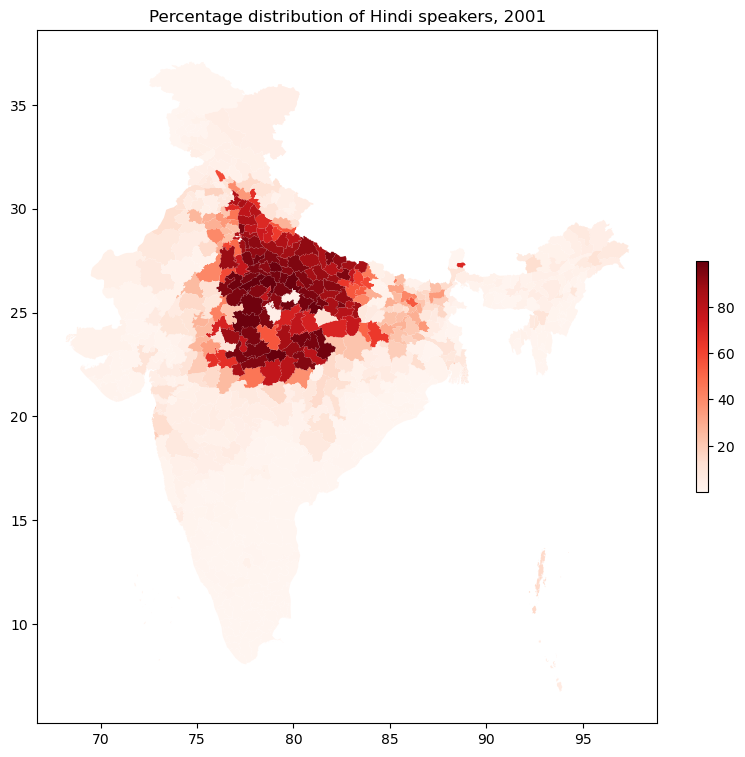

In [34]:
#df = df[~df["ST_NM"].isin(['Andaman & Nicobar Island',       'Lakshadweep'])]
#plt.figure(figsize = [12,12])


In [ ]:
#https://censusindia.gov.in/nada/index.php/catalog/22865/download/25996/PC01_C16_24.xls